In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
df = pd.read_csv('Property_Sales_History_Property_Sales_History.csv')

C:\Users\SVI\AppData\Local\Temp\ipykernel_3828\1892628201.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Property_Sales_History_Property_Sales_History.csv')


In [4]:
df.head()
df.tail()

,PARCELNO,PROPCLASS,PROPADDR,SALEDATE,SALEPRICE,SALENO,GRANTEE,GRANTOR,SalesInstr,PROPNO,PROPDIR,PROPSTR,PROPZIP,SALETERMS
601993,22107119.006,461,"20830 N\r\nPIERSON, CT\r\n(38.74959, -94.80862)",05/19/2004,$73267.00,1,FEDERAL NATL MORTGAGE ASSOC,"COPELAND, ARTHUR",SD,20830,N,PIERSON CT,48228,BANK SALE
601994,21052045-7,403,"621 N\r\nPIPER, CT\r\n(38.04312, -78.4676)",02/01/1995,$192500.00,1,NaN,NaN,WD,621,N,PIPER CT,48215,REVIEW NEEDED
601995,22107119.032,401,"20727 S\r\nPIERSON, CT\r\n(39.006224, -94.825893)",07/01/1994,$29500.00,1,NaN,NaN,WD,20727,S,PIERSON CT,48228,ARMS LENGTH
601996,21051952-3,403,"530 S\r\nPIPER, CT\r\n(40.14511, -76.60256)",07/26/2002,$284000.00,1,WARREN AND JANICE SYLVERTOOTH,MICHAEL L BAKER,PTA,530,S,PIPER CT,48215,ARMS LENGTH
601997,22107119.025,401,"20785 S\r\nPIERSON, CT\r\n(29.633451, -98.296112)",05/19/2006,$58000.00,1,"JOHNSON, DONNA",CUSTOM CLOSING SERVICE INC,PTA,20785,S,PIERSON CT,48228,ARMS LENGTH


In [5]:
#the SALEPRICE here is in string and has "$" prefix. so first replacing "$" with empty space
df['SALEPRICE'] = df['SALEPRICE'].str.replace('$', '')

#now typecasting the string to float
df['SALEPRICE'] = df['SALEPRICE'].astype(float)

C:\Users\SVI\AppData\Local\Temp\ipykernel_3828\533734603.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['SALEPRICE'] = df['SALEPRICE'].str.replace('$', '')


In [6]:
#filling the null values using the interpolate method(try using other methods like linear, quadratic instead of cubic)
df['SALEPRICE'].interpolate(method='cubic', inplace=True)
df2 = df[['SALEDATE','SALEPRICE']]
df2

,SALEDATE,SALEPRICE
0,03/02/2016,1.000000
1,03/02/2016,5000.000000
2,03/02/2016,7495.056193
3,03/02/2016,1.000000
4,03/02/2016,4400.000000
...,...,...
601993,05/19/2004,73267.000000
601994,02/01/1995,192500.000000
601995,07/01/1994,29500.000000
601996,07/26/2002,284000.000000


In [7]:
#grouping the data based upon dates and adding all the SALEPRICE of the single date
grouped_df = df.groupby(['SALEDATE'])['SALEPRICE'].sum()
grouped_df

SALEDATE
01/01/1990    2.773971e+07
01/01/1991    2.542065e+07
01/01/1992    2.256761e+07
01/01/1993    2.357300e+07
01/01/1994    2.783119e+07
                  ...     
12/31/2011    2.568447e+06
12/31/2012    3.739879e+07
12/31/2013    2.401792e+07
12/31/2014    1.406747e+08
12/31/2015    9.544724e+05
Name: SALEPRICE, Length: 7758, dtype: float64

In [8]:
#resetting the index
grouped_df = grouped_df.reset_index()
grouped_df.head(100)

,SALEDATE,SALEPRICE
0,01/01/1990,2.773971e+07
1,01/01/1991,2.542065e+07
2,01/01/1992,2.256761e+07
3,01/01/1993,2.357300e+07
4,01/01/1994,2.783119e+07
...,...,...
95,01/05/2003,2.932103e+05
96,01/05/2004,2.336487e+06
97,01/05/2005,5.048693e+06
98,01/05/2006,4.964212e+06


In [9]:
#looking out for maximum SALEPRICE value present in the dataframe 
max_value = df['SALEPRICE'].max()
print(max_value)

4629338150.227232


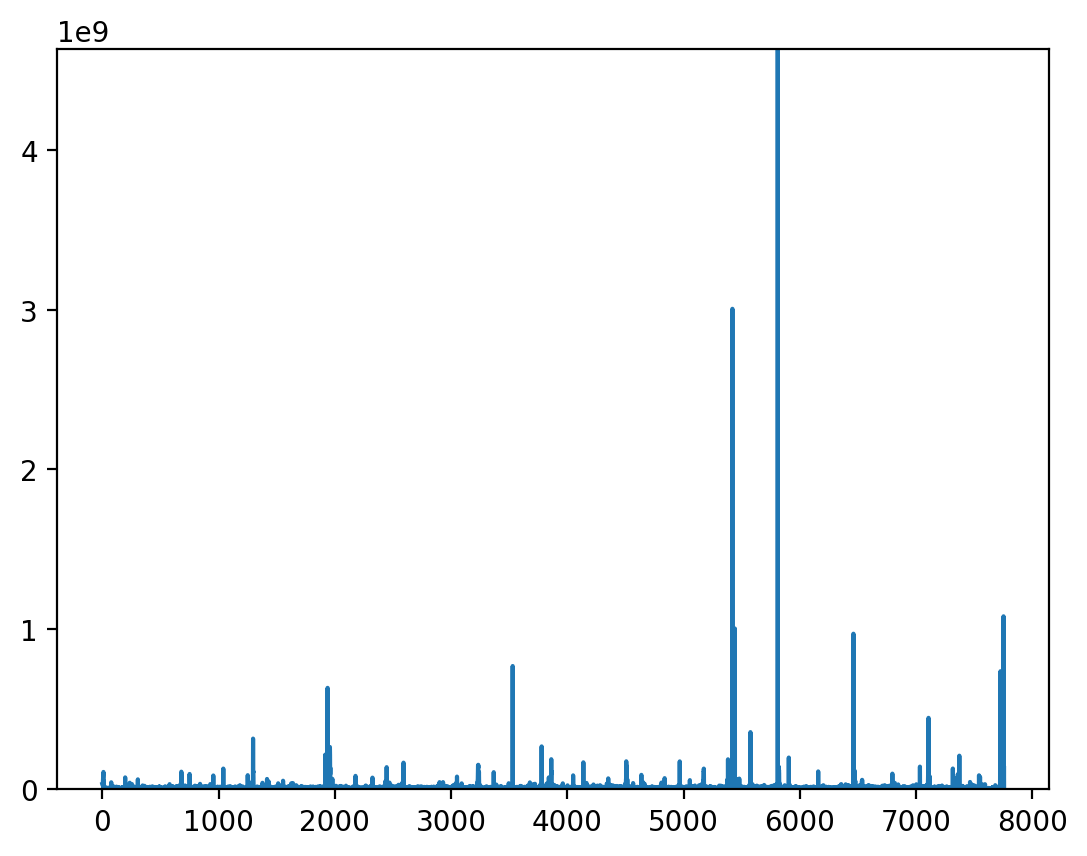

In [10]:
#to enhanse the quality of the graph
%config InlineBackend.figure_format = 'retina'

#max and min value range of y axis
plt.ylim(0.00, max_value)


#plotting of the graph
plt.plot(grouped_df.index,grouped_df['SALEPRICE'])

In [11]:
grouped_df.head(50)

,SALEDATE,SALEPRICE
0,01/01/1990,2.773971e+07
1,01/01/1991,2.542065e+07
2,01/01/1992,2.256761e+07
3,01/01/1993,2.357300e+07
4,01/01/1994,2.783119e+07
5,01/01/1995,3.729919e+07
6,01/01/1996,6.235582e+07
7,01/01/1997,6.748070e+07
8,01/01/1998,8.032760e+07
9,01/01/1999,9.606145e+07


In [12]:
# Convert the 'date' column to a datetime
grouped_df['SALEDATE']=pd.to_datetime(grouped_df['SALEDATE'])
# Set the 'date' column as the index of the DataFrame
grouped_df=grouped_df.set_index('SALEDATE')
# Set the 'date' column as the index of the DataFrame
resample_df=grouped_df.resample('Y').mean()
# Group the data by the year
grouped_df1=resample_df.groupby(resample_df.index.year).mean()

In [13]:
grouped_df1=grouped_df1.reset_index()


In [14]:
grouped_df1


,SALEDATE,SALEPRICE
0,1990,1.031140e+07
1,1991,2.978182e+06
2,1992,2.579047e+06
3,1993,2.278707e+06
4,1994,2.252819e+06
5,1995,2.897638e+06
6,1996,3.947906e+06
7,1997,6.234550e+06
8,1998,6.841546e+06
9,1999,6.269937e+06


In [15]:
# Calculate the mean and standard deviation of the salesprice
mean=np.mean(grouped_df1['SALEPRICE'])
std_dev=np.std(grouped_df1['SALEPRICE'])

In [16]:
# Calculate the Z-score for each sales data point
grouped_df1['z-score']=(grouped_df1['SALEPRICE']-mean)/std_dev

In [17]:
# Identify the outliers
grouped_df1['outliers']=np.where(grouped_df1['z-score']>3,True,np.where(grouped_df1['z-score']<-3,True,False))

In [18]:
# to represent outlier
print(grouped_df1[grouped_df1['outliers']==True])

    SALEDATE     SALEPRICE   z-score  outliers
25      2015  6.681388e+07  4.885447      True


In [19]:
# to see min val now replace the outlier with this min val or max val
grouped_df1['SALEPRICE'].describe()

count    2.700000e+01
mean     7.655697e+06
std      1.233973e+07
min      1.000921e+06
25%      2.902348e+06
50%      4.273396e+06
75%      6.662868e+06
max      6.681388e+07
Name: SALEPRICE, dtype: float64

In [20]:
minVal=grouped_df1['SALEPRICE'].min()
minVal

1000921.1939039711

In [21]:

grouped_df1.head()


,SALEDATE,SALEPRICE,z-score,outliers
0,1990,1.031140e+07,0.219315,False
1,1991,2.978182e+06,-0.386282,False
2,1992,2.579047e+06,-0.419244,False
3,1993,2.278707e+06,-0.444047,False
4,1994,2.252819e+06,-0.446185,False


In [25]:
grouped_df1.loc[grouped_df1['outliers']==True,'SALEPRICE']=minVal
grouped_df1

,SALEDATE,SALEPRICE,z-score,outliers
0,1990,1.031140e+07,0.219315,False
1,1991,2.978182e+06,-0.386282,False
2,1992,2.579047e+06,-0.419244,False
3,1993,2.278707e+06,-0.444047,False
4,1994,2.252819e+06,-0.446185,False
5,1995,2.897638e+06,-0.392934,False
6,1996,3.947906e+06,-0.306200,False
7,1997,6.234550e+06,-0.117362,False
8,1998,6.841546e+06,-0.067235,False
9,1999,6.269937e+06,-0.114440,False


In [26]:
grouped_df1['YEAR']=grouped_df1['SALEDATE']
grouped_df1.head()

,SALEDATE,SALEPRICE,z-score,outliers,YEAR
0,1990,1.031140e+07,0.219315,False,1990
1,1991,2.978182e+06,-0.386282,False,1991
2,1992,2.579047e+06,-0.419244,False,1992
3,1993,2.278707e+06,-0.444047,False,1993
4,1994,2.252819e+06,-0.446185,False,1994


In [47]:
df_final=grouped_df1.drop(columns=['SALEDATE','z-score','outliers'])
df_final=df_final.set_index('YEAR')
df_final.head()

,SALEPRICE
YEAR,
1990,1.031140e+07
1991,2.978182e+06
1992,2.579047e+06
1993,2.278707e+06
1994,2.252819e+06


<BarContainer object of 27 artists>

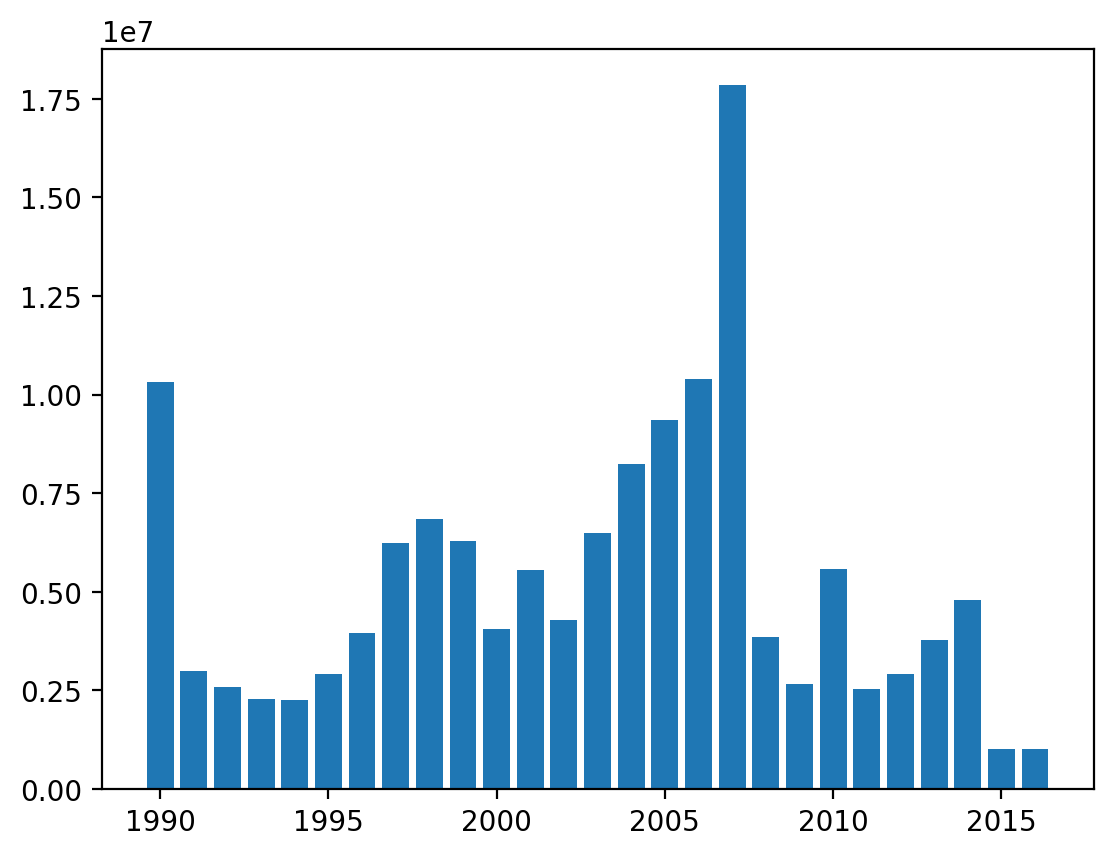

In [32]:
plt.bar(df_final['YEAR'],df_final['SALEPRICE'])

In [33]:
# i am using holt winters exponential model  and as the analysis is year wise seasonal period val is 12
model=ExponentialSmoothing(endog= df_final['SALEPRICE'],trend="add",seasonal="add",seasonal_periods=12)

In [42]:
fit_model=model.fit()
predictions = fit_model.forecast(steps=5)
predictions=predictions.to_frame()

C:\Users\SVI\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [50]:

predictions['YEAR']=[2017,2018,2019,2020,2021]
predictions.head()
predictions=predictions.set_index('YEAR')

TypeError: Index(...) must be called with a collection of some kind, 'YEAR' was passed